In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
import sncosmo
#import jp as sncosmo
import astropy.units as u
import glob
import numpy as np
import os.path
from tabulate import tabulate
import math



megacg = sncosmo.get_bandpass('megacampsf::g', 10.0)
megacr = sncosmo.get_bandpass('megacampsf::r', 10.0)
megaci = sncosmo.get_bandpass('megacampsf::i', 10.0)

sncosmo.register(megacg, 'mcg', force = True)
sncosmo.register(megacr, 'mcr', force = True)
sncosmo.register(megaci, 'mci', force = True)

dust = sncosmo.CCM89Dust()


#sdss = sncosmo.get_magsystem('sdss')

salt2 = sncosmo.SALT2Source(modeldir=None, m0file='M0.dat', m1file='M1.dat', clfile='salt2_color_correction.dat', cdfile='salt2_color_dispersion.dat', errscalefile='salt2_lc_dispersion_scaling.dat', lcrv00file='salt2_lc_relative_variance_0.dat', lcrv11file='salt2_lc_relative_variance_1.dat', lcrv01file='salt2_lc_relative_covariance_01.dat', name=None, version=None)
#ab = sncosmo.get_magsystem('ab')
chi_quad_ndof = []
names = glob.glob("*lc-sn2004gu.list")

#print(names)
for j in range(0, len(names)):
    #j = 4
    print(names[j])

    data = sncosmo.read_lc(names[j], format='salt2')
    
    
    
    if data["Filter"][0][:-3] == "MEGACAMPSF":
    
        r = math.sqrt(data.meta['X_FOCAL_PLANE']**2 + data.meta['Y_FOCAL_PLANE']**2)


        megacg = sncosmo.get_bandpass('megacampsf::g', r)
        megacr = sncosmo.get_bandpass('megacampsf::r', r)
        megaci = sncosmo.get_bandpass('megacampsf::i', r)
        megacz = sncosmo.get_bandpass('megacampsf::z', r)

        sncosmo.register(megacg, 'MEGACAMPSF::g', force = True)
        sncosmo.register(megacr, 'MEGACAMPSF::r', force = True)
        sncosmo.register(megaci, 'MEGACAMPSF::i', force = True)
        sncosmo.register(megacz, 'MEGACAMPSF::z', force = True)
    
    
    
    
    #for i in range(0, len(data['flux'])):
        
    #data['fluxerr'][i] = 2*np.log(10)*(10**((data['zp'][i] - data['flux'][i])/2.5))*data['fluxerr'][i]/2.5 #flux error conversion
    #data['fluxerr'][i] = (2*np.log(10)/5)*10**(2*(data['zp'][i] - data['flux'][i])/5)*data['fluxerr'][i]
        
    #data['flux'][i] = csp.band_mag_to_flux(data['flux'][i], 'cspr')              
            
            
    #print(data['flux'])
    tempmodel = sncosmo.Model(source = salt2)              
            
    model = sncosmo.Model(source=salt2)
    #model2.set(c=0)
    #model.set(x1=0)
    model.set(z = 0.0459)  # set the model's redshift
    
    result, fitted_model = sncosmo.fit_lc(data, model, ['t0', 'x0','x1','c'], phase_range=(-10., 50.), wave_range=(4000., 7000.))
    
    
    chi_quad_ndof.append(result.chisq/result.ndof)
                
#sncosmo.plot_lc(data, model=fitted_model, errors=result.errors)
#plt.show()
print(chi_quad_ndof)
print(np.mean(chi_quad_ndof), np.std(chi_quad_ndof))
#sncosmo.plot_lc(data, model=fitted_model, errors=result.errors)
#plt.show()

lc-sn2004gu.list


/home/joao/.local/lib/python3.8/site-packages/sncosmo/fitting.py:154: RuntimeWarning: Dropping following bands from data: swope2::u(out of model wavelength range)
  warnings.warn("Dropping following bands from data: " +
<ipython-input-1-a15a296dd76d>:75: DeprecationWarning: Using keyword `forced_parameters` is deprecated. Use `name` instead
  result, fitted_model = sncosmo.fit_lc(data, model, ['t0', 'x0','x1','c'], phase_range=(-10., 50.), wave_range=(4000., 7000.))


[65.92418186093683]
65.92418186093683 0.0


In [2]:
model = sncosmo.Model(source='salt2', effects=[sncosmo.F99Dust()],effect_names=['mw'], effect_frames=['obs'])

In [3]:
from sncosmo import photdata as pd

<IPython.core.display.Javascript object>


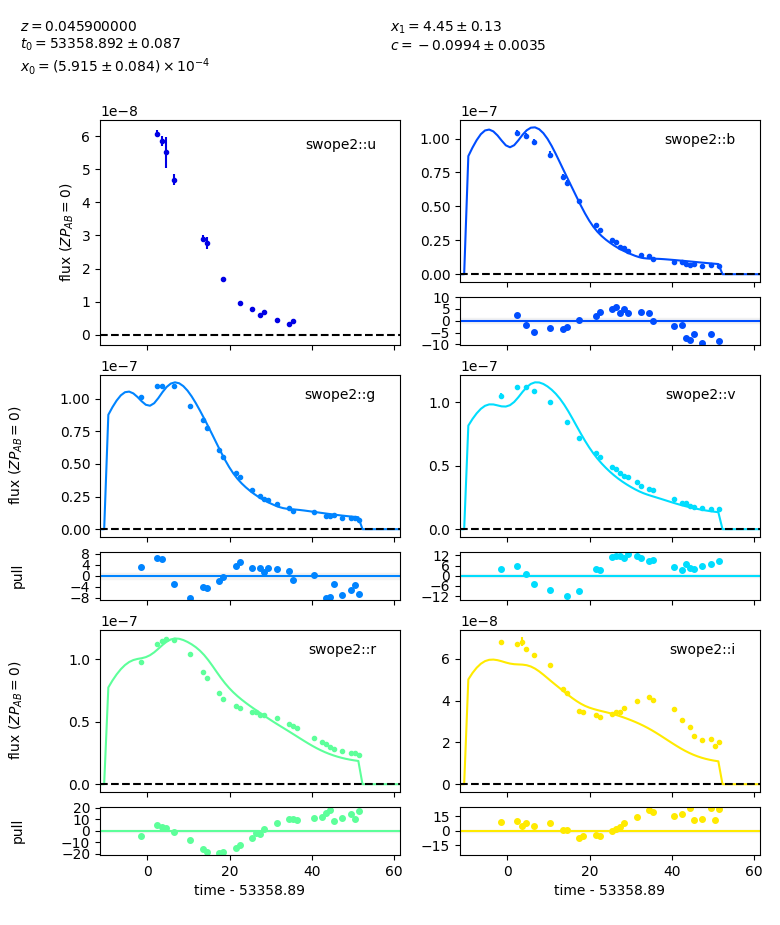

In [4]:
%matplotlib notebook
#sncosmo.plot_lc(bands = ['sdssg'], model=fitted_model2, errors=result2.errors, zp = 15, zpsys = 'ab')
sncosmo.plot_lc(data, model=fitted_model, errors=result.errors,  zp = 0, zsys = 'ab')
plt.show()

In [5]:
result.covariance[1][3]

-1.448497417667686e-08

In [6]:
result.covariance[3][1]

-1.448497417667686e-08

In [7]:
result.vparam_names

['t0', 'x0', 'x1', 'c']

In [8]:
teste = sncosmo.read_lc("lc2fit_i.dat", format='salt2')

In [9]:
teste

Date,Flux,Fluxerr,ZP
float64,float64,float64,float64
53616.439,2557.79072,285.4838,30.0
53628.402,7127.27084,427.23379,30.0
53635.41,5131.76393,383.78975,30.0
53639.449,4145.56315,302.77339,30.0
53641.449,4199.56532,322.21665,30.0
53644.397,4088.46834,230.59148,30.0
53657.408,945.01353,546.73568,30.0
53663.393,2056.4122,401.87136,30.0
53666.463,1240.30735,316.41017,30.0


In [10]:
data_list = pd.PhotometricData(data).normalized(zp=17, zpsys='ab')

In [11]:
data_list.flux

array([0.65552384, 0.64178341, 0.61629477, 0.55588952, 0.45434786,
       0.42637181, 0.33836738, 0.22918621, 0.20748585, 0.15899684,
       0.15198072, 0.12769929, 0.12251478, 0.10868972, 0.08737526,
       0.08359658, 0.07220853, 0.05672683, 0.05513006, 0.04740111,
       0.04291296, 0.04753226, 0.04030774, 0.04205218, 0.03618999,
       0.63901402, 0.69360208, 0.69168825, 0.69041529, 0.59362259,
       0.52857961, 0.490129  , 0.38221736, 0.34890758, 0.27133786,
       0.2527612 , 0.19050677, 0.16140256, 0.14571706, 0.13954376,
       0.12053423, 0.10183813, 0.08902468, 0.08501791, 0.06396029,
       0.06147668, 0.06685138, 0.05374158, 0.05403939, 0.05534908,
       0.04646334, 0.42919926, 0.42292072, 0.4307834 , 0.40950477,
       0.38999493, 0.36129251, 0.28910724, 0.27634968, 0.22032256,
       0.2168997 , 0.20886177, 0.20335692, 0.21235327, 0.21951235,
       0.21850378, 0.2292234 , 0.25018367, 0.26342619, 0.25319724,
       0.22587021, 0.19528054, 0.17260722, 0.14476346, 0.13485

In [12]:
table = []

for i in range(0,len(data_list.time)):

    table.append((data_list.time[i], data["band"][i], data_list.flux[i], data_list.fluxerr[i], data_list.zp[i], data_list.zpsys[i], data['redshift'][0]))   

KeyError: 'band'

In [ ]:
save_path = "/home/joao/Documentos/templates/analise_superficies/" 

In [ ]:
name_of_file = "sncosmonorm"

completeName = os.path.join(save_path, name_of_file+".txt")    

header = "#time    band  flux        fluxerr      zp     zpsys redshift"

f = open(completeName, 'w')               
f.write(header + "\n")
f.write(tabulate(table, tablefmt="plain"))
f.close()